In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
#import necessary libraries

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [3]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Processing...
Done!


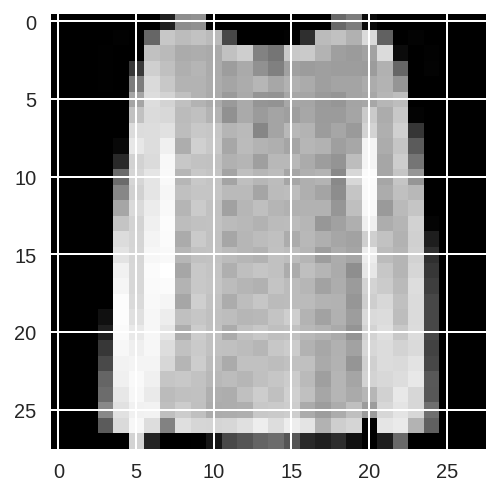

In [6]:
#Let's see one of the image
image, label = next(iter(trainloader))
plt.imshow(image[1].numpy().squeeze(),cmap='Greys_r' )

**Building the network**

In [0]:
from torch import nn, optim
import torch.nn.functional as F

In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    
    #Inputs to hidden layer linear transformation 
    self.hidden1 = nn.Linear(784, 256)
    self.hidden2 = nn.Linear(256, 128)
    self.hidden3 = nn.Linear(128, 64)
    
    
    #Output layer, 10 units - one for each
    self.output = nn.Linear(64, 10)
    
  def forward(self, x):
    
    # make sure input tensor is flattened
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.hidden1(x))
    x = F.relu(self.hidden2(x))
    x = F.relu(self.hidden3(x))
    x = F.log_softmax(self.output(x), dim=1)
    
    return x

**Training the network**

In [0]:
# TODO: Create the network, define the criterion and optimizer
model = Network()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [21]:
# TODO: Train the network here
epoch = 5

for i in range(epoch):
  running_loss = 0
  for images, labels in trainloader:
    log_ps = model(images)
    loss = criterion(log_ps, labels)
    
    #TODO: Training pass 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
  else:
    print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.518397015612771
Training loss: 0.39253878528311814
Training loss: 0.3552737444845725
Training loss: 0.33316343910753854
Training loss: 0.3151133756425335


In [0]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    
    plt.tight_layout()

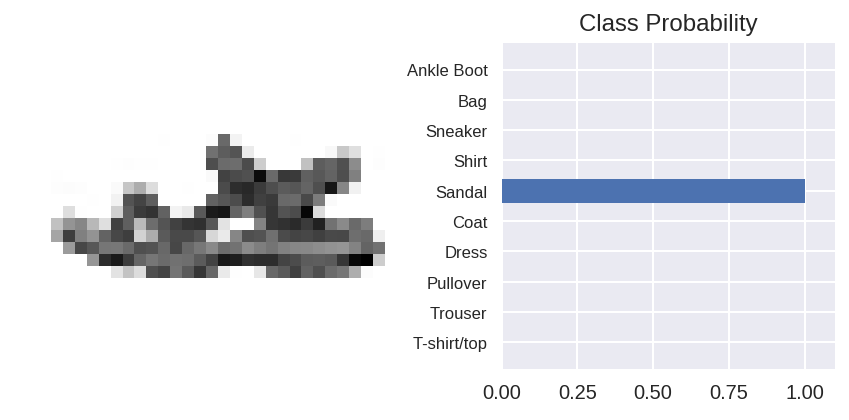

In [26]:
images, labels = next(iter(testloader))
img = images[5]
# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
view_classify(img, ps, version='Fashion')

for more details visit this link

https://github.com/udacity/deep-learning-v2-pytorch/blob/master/intro-to-pytorch/Part%204%20-%20Fashion-MNIST%20(Solution).ipynb